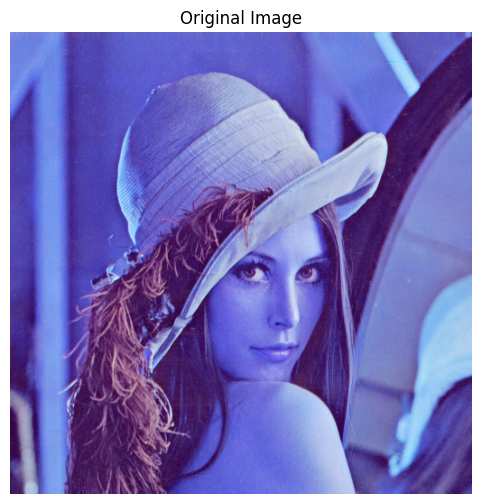

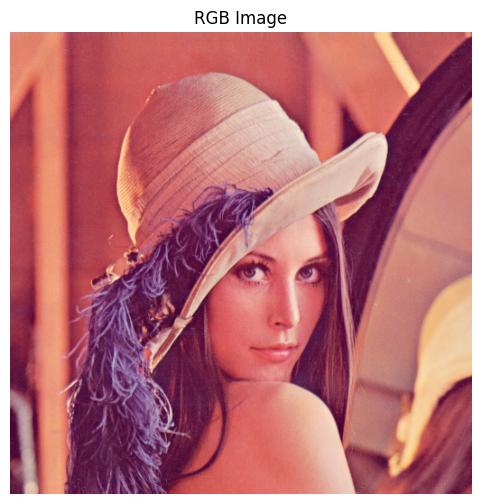

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.filters import roberts, prewitt, sobel
from skimage.segmentation import watershed
from scipy import ndimage

image_path = "lena.png"
image = cv2.imread(image_path)
plt.figure(figsize=(6,6))
plt.imshow(image)
plt.title("Original Image")
plt.axis("off")
plt.show()
cv2.imwrite("brg.jpg", image)


image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(6,6))
plt.imshow(image_rgb)
plt.title("RGB Image")
plt.axis("off")
plt.show()



Image Size: 512x512 pixels
Total pixels: 262144


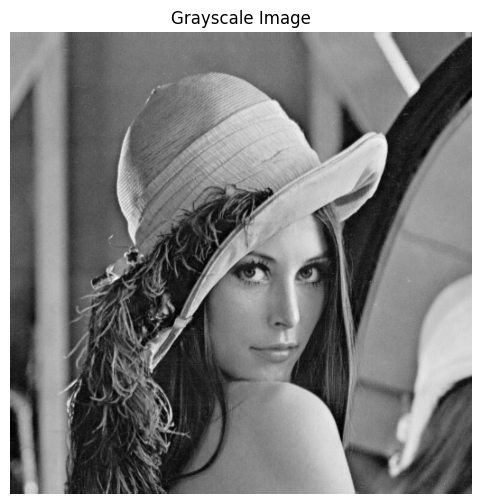

In [4]:
height, width, channels = image.shape
print(f"Image Size: {width}x{height} pixels")
print(f"Total pixels: {width * height}")

gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

plt.figure(figsize=(6,6))
plt.imshow(gray_image, cmap='gray')
plt.title("Grayscale Image")
plt.axis("off")
plt.show()



Black Pixels Count: 130547


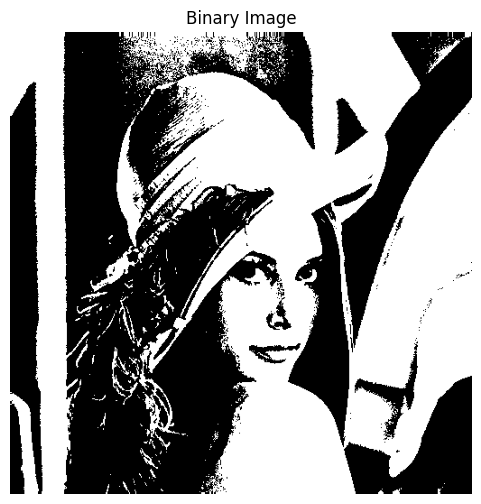

True

In [5]:
_, binary_image = cv2.threshold(gray_image, 128, 255, cv2.THRESH_BINARY)

black_pixel_count = np.sum(binary_image == 0)
print(f"Black Pixels Count: {black_pixel_count}")

plt.figure(figsize=(6,6))
plt.imshow(binary_image, cmap='gray')
plt.title("Binary Image")
plt.axis("off")
plt.show()

cv2.imwrite("grayscale_image.jpg", gray_image)
cv2.imwrite("binary_image.jpg", binary_image)



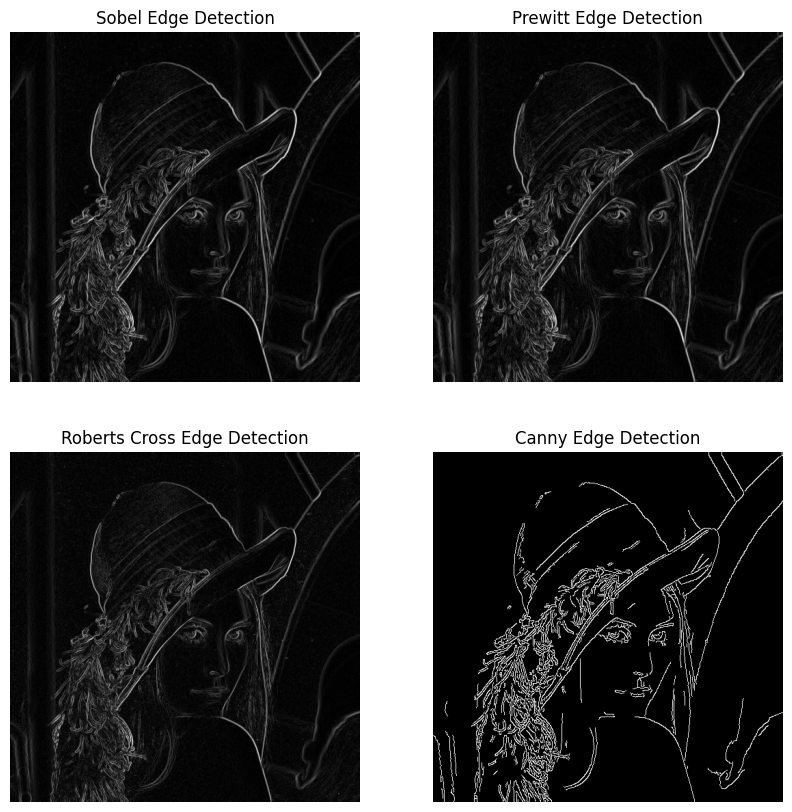

In [6]:

sobel_edges = sobel(gray_image)

prewitt_edges = prewitt(gray_image)

roberts_edges = roberts(gray_image)

canny_edges = cv2.Canny(gray_image, 100, 200)

fig, axs = plt.subplots(2, 2, figsize=(10,10))
axs[0, 0].imshow(sobel_edges, cmap='gray')
axs[0, 0].set_title('Sobel Edge Detection')
axs[0, 1].imshow(prewitt_edges, cmap='gray')
axs[0, 1].set_title('Prewitt Edge Detection')
axs[1, 0].imshow(roberts_edges, cmap='gray')
axs[1, 0].set_title('Roberts Cross Edge Detection')
axs[1, 1].imshow(canny_edges, cmap='gray')
axs[1, 1].set_title('Canny Edge Detection')

for ax in axs.flat:
    ax.axis("off")

plt.show()



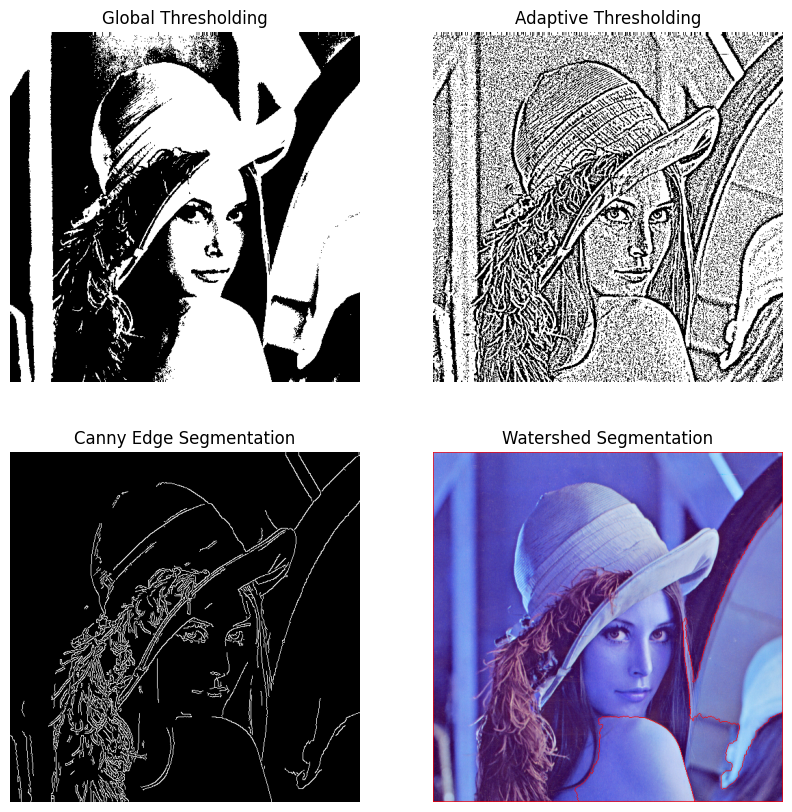

Task Completed! Images saved successfully.


In [7]:

_, global_thresh = cv2.threshold(gray_image, 127, 255, cv2.THRESH_BINARY)

adaptive_thresh = cv2.adaptiveThreshold(gray_image, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 2)

canny_segmentation = cv2.Canny(gray_image, 100, 200)


#(Watershed Algorithm)
image_color = cv2.imread('lena.png')
gray = cv2.cvtColor(image_color, cv2.COLOR_BGR2GRAY)

# Noise Removal
blurred = cv2.GaussianBlur(gray, (5, 5), 0)


_, binary = cv2.threshold(blurred, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)


dist_transform = cv2.distanceTransform(binary, cv2.DIST_L2, 5)
_, sure_fg = cv2.threshold(dist_transform, 0.7 * dist_transform.max(), 255, 0)


sure_bg = cv2.dilate(binary, np.ones((3, 3), np.uint8), iterations=3)


sure_fg = np.uint8(sure_fg)
unknown = cv2.subtract(sure_bg, sure_fg)


_, markers = cv2.connectedComponents(sure_fg)


markers = markers + 1
markers[unknown == 255] = 0


cv2.watershed(image_color, markers)
image_color[markers == -1] = [255, 0, 0]


fig, axs = plt.subplots(2, 2, figsize=(10,10))
axs[0, 0].imshow(global_thresh, cmap='gray')
axs[0, 0].set_title('Global Thresholding')
axs[0, 1].imshow(adaptive_thresh, cmap='gray')
axs[0, 1].set_title('Adaptive Thresholding')
axs[1, 0].imshow(canny_segmentation, cmap='gray')
axs[1, 0].set_title('Canny Edge Segmentation')
axs[1, 1].imshow(image_color, cmap='gray')
axs[1, 1].set_title('Watershed Segmentation')

for ax in axs.flat:
    ax.axis("off")

plt.show()

cv2.imwrite("global_threshold.jpg", global_thresh)
cv2.imwrite("adaptive_threshold.jpg", adaptive_thresh)
cv2.imwrite("canny_segmentation.jpg", canny_segmentation)
cv2.imwrite("watershed_segmentation.jpg", image_color)

print("Task Completed! Images saved successfully.")


In [12]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
import numpy as np

(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train, x_test = x_train / 255.0, x_test / 255.0

x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    MaxPooling2D((2,2)),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D((2,2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=50, validation_data=(x_test, y_test), batch_size=64)

y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)



/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
938/938 ━━━━━━━━━━━━━━━━━━━━ 48s 50ms/step - accuracy: 0.8914 - loss: 0.3652 - val_accuracy: 0.9848 - val_loss: 0.0466
Epoch 2/50
938/938 ━━━━━━━━━━━━━━━━━━━━ 46s 49ms/step - accuracy: 0.9855 - loss: 0.0472 - val_accuracy: 0.9883 - val_loss: 0.0339
Epoch 3/50
938/938 ━━━━━━━━━━━━━━━━━━━━ 83s 50ms/step - accuracy: 0.9912 - loss: 0.0304 - val_accuracy: 0.9889 - val_loss: 0.0344
Epoch 4/50
938/938 ━━━━━━━━━━━━━━━━━━━━ 81s 49ms/step - accuracy: 0.9928 - loss: 0.0239 - val_accuracy: 0.9906 - val_loss: 0.0294
Epoch 5/50
938/938 ━━━━━━━━━━━━━━━━━━━━ 81s 48ms/step - accuracy: 0.9941 - loss: 0.0177 - val_accuracy: 0.9923 - val_loss: 0.0246
Epoch 6/50
938/938 ━━━━━━━━━━━━━━━━━━━━ 82s 48ms/step - accuracy: 0.9960 - loss: 0.0128 - val_accuracy: 0.9909 - val_loss: 0.0260
Epoch 7/50
938/938 ━━━━━━━━━━━━━━━━━━━━ 83s 49ms/step - accuracy: 0.9968 - loss: 0.0099 - val_accuracy: 0.9913 - val_loss: 0.0303
Epoch 8/50
938/938 ━━━━━━━━━━━━━━━━━━━━ 81s 48ms/step - accuracy: 0.9976 - loss: 0.0071 - 

              precision    recall  f1-score   support

           0       0.99      1.00      1.00       980
           1       1.00      1.00      1.00      1135
           2       1.00      0.99      0.99      1032
           3       0.99      0.99      0.99      1010
           4       1.00      1.00      1.00       982
           5       0.99      0.99      0.99       892
           6       0.99      0.99      0.99       958
           7       0.98      0.99      0.99      1028
           8       1.00      0.99      0.99       974
           9       0.99      0.99      0.99      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000

AUC Score: 0.9999


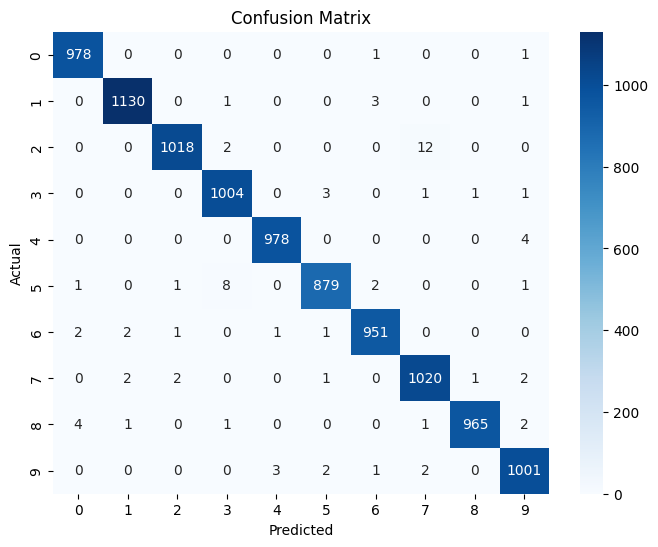

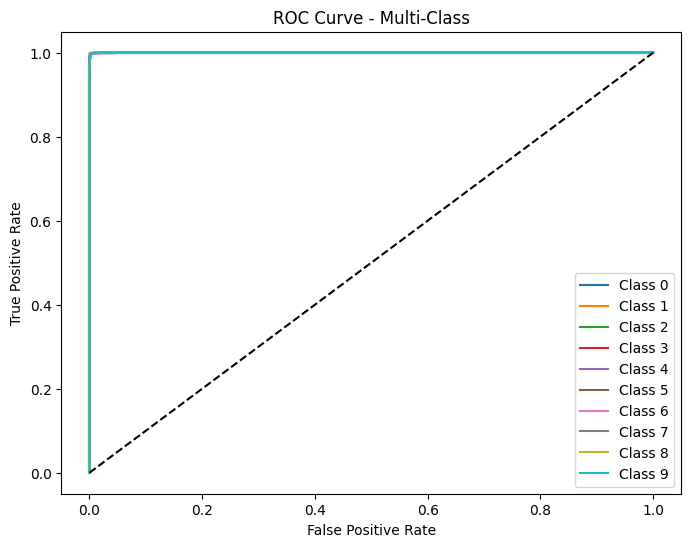

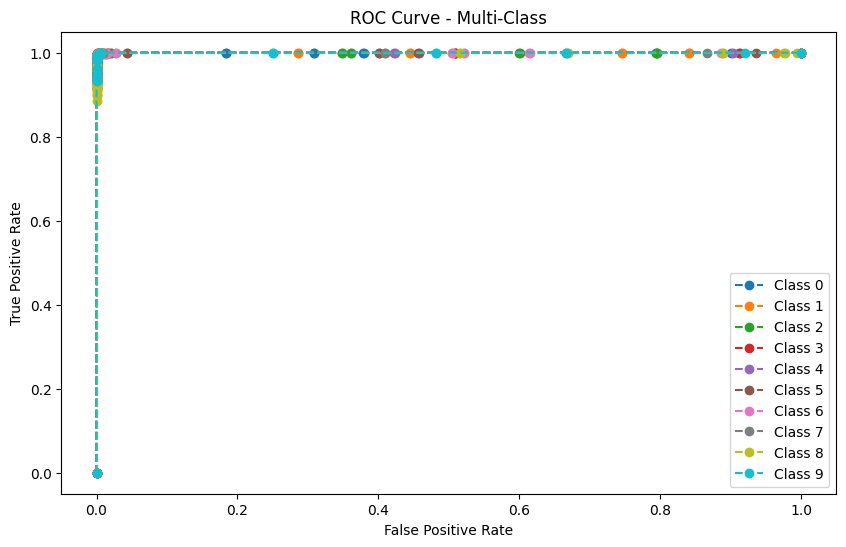

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
print(classification_report(y_true_classes, y_pred_classes))

auc = roc_auc_score(y_test, y_pred, multi_class='ovr')
print(f"AUC Score: {auc:.4f}")

cm = confusion_matrix(y_true_classes, y_pred_classes)

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=range(10), yticklabels=range(10))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


fpr, tpr = {}, {}
for i in range(10):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_pred[:, i])

plt.figure(figsize=(8,6))
for i in range(10):
    plt.plot(fpr[i], tpr[i], label=f'Class {i}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Multi-Class')
plt.legend()
plt.show()

plt.figure(figsize=(10,6))
for i in range(10):
    plt.plot(fpr[i], tpr[i], linestyle='--', marker='o', label=f"Class {i}")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Multi-Class")
plt.legend()
plt.show()

